<a href="https://colab.research.google.com/github/gg5d/Math_Intro_NN/blob/master/NN_intro_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Math Intro to NN for DS1001

Gianluca Guadagni - gg5d - Nov 2024

![full NN](https://github.com/gg5d/Math_Intro_NN/blob/master/screenshots_NN/full_NN.png?raw=true")

Let's be a little bit formal

<img src="https://github.com/gg5d/Math_Intro_NN/blob/master/screenshots_NN/one_step_matrix_NN.png?raw=true">

We are going to play with a (small but) real NN composed by 1) an input layer with one node, 2) one hidden layer with two nodes, and 3) an output layer with one node

![small NN](https://github.com/gg5d/Math_Intro_NN/blob/master/screenshots_NN/small_NN.png?raw=true)

In Machine Learning, the process of going from the green input to the red output is called FORWARD PROPAGATION, the same process, in Mathematics, is called a FUNCTION 😊.

Based on the matrix formulas outlined above, we are going to write the forward propagation in details for the NN(1,2,1): one node as input layer, 2 nodes as hidden layer, and one node as output layer

There are 7 parameters in this model, 4 W's and 3 b's.

Let's start with the first half

![LHS NN](https://github.com/gg5d/Math_Intro_NN/blob/master/screenshots_NN/small_NN_LHS.png?raw=true)

Now the second half

![RHS NN](https://github.com/gg5d/Math_Intro_NN/blob/master/screenshots_NN/small_NN_RHS.png?raw=true)

Now, we are going to put the two halves together

![full NN formula](https://github.com/gg5d/Math_Intro_NN/blob/master/screenshots_NN/small_NN_full_output.png?raw=true)


Enough Math, let's do some coding and implement the NN. We will generate the forward propagation function. Look at the second row above as the best reference for the code.

Some imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Define the number of input, hidden, and output nodes
input_nodes = 1
hidden_nodes = 2
output_nodes = 1

Define the **activation** function **$\mathbf{\sigma(x)}$**, and its derivative **$\mathbf{\sigma'(x)}$**:

In [3]:
def sigma(x):
    return x*(x>0)               # ReLU
#    return 1 / (1 + np.exp(-x)) # sigmoid

# Define the derivative of the activation function
def sigma_derivative(x):
    return 1*(x>0)                # ReLU
#    return sigma(x) * (1 - sigma(x)) #sigmoid


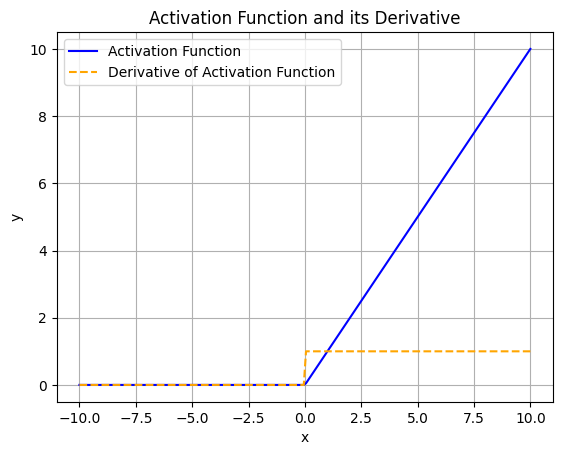

In [4]:
# Generate a range of values from -10 to 10 to plot
x_values = np.linspace(-10, 10, 200)
sigma_values = sigma(x_values)
sigma_derivative_values = sigma_derivative(x_values)

# Plotting both functions
plt.plot(x_values, sigma_values, label='Activation Function', color='blue')
plt.plot(x_values, sigma_derivative_values, label='Derivative of Activation Function', color='orange', linestyle='--')
plt.title('Activation Function and its Derivative')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

Define the **forward propagation** function [This is the function that will compute $\mathbf{a}^{(1)}$ and $\mathbf{a}^{(2)}$]

In [5]:
# Define the forward propagation function
def forward_propagation(x):
    z1 = np.dot(W1, x) + b1
    a1 = sigma(z1)
    z2 = np.dot(W2, a1) + b2
    a2 = sigma(z2)
    return a1, a2


For convenience, we also define a range of values for $x$, and a function to evaluate the output $y$ for each of the $x$'s. We'll need this for the plots.

In [6]:
# Generate 100 values for x
X = np.linspace(start=-1, stop=2,num=100)

# Evaluate the output y based on the forward propagation
def output(X):
    outp = np.array([])
    for j in range(X.shape[0]):
        x = X[j].reshape(input_nodes, 1)
        a1, a2 = forward_propagation(x)
        outp = np.append(outp,a2)
    return outp

Now, let's try the NN for some choice of the parameters W's and b'.


Initialize weights $W$ and biases $b$ (close to the actual values)

In [7]:
#
W1 = np.array([[1.5],[1.5]]) # np.random.randn(hidden_nodes, input_nodes)
b1 = np.array([[0.8],[-.5]]) # np.zeros((hidden_nodes, 1))
W2 = np.array([[1.0,-2.4]]) #np.random.randn(output_nodes, hidden_nodes)
b2 = np.array([[1.0]]) #np.zeros((output_nodes, 1))

Let's plot the output of the NN, $y$ vs $x$

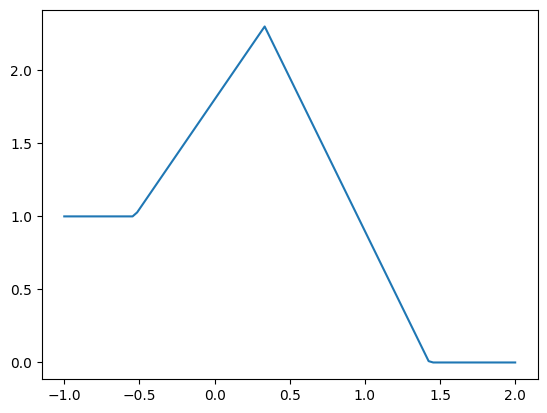

In [8]:
X = np.linspace(start=-1, stop=2,num=100)
Y = output(X)
plt.plot(X,Y, label="NN")

With the following choice of the parameters, we get a triangular function

In [9]:
#
W1 = np.array([[1.0],[1.0]]) # np.random.randn(hidden_nodes, input_nodes)
b1 = np.array([[0.0],[-.5]]) # np.zeros((hidden_nodes, 1))
W2 = np.array([[2.0,-4.0]]) #np.random.randn(output_nodes, hidden_nodes)
b2 = np.array([[0.0]]) #np.zeros((output_nodes, 1))

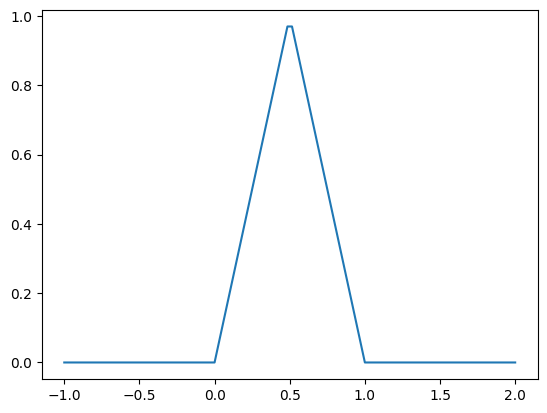

In [10]:
X = np.linspace(start=-1, stop=2,num=100)
Y = output(X)
plt.plot(X,Y, label="NN")

The triangular function can also be defined, as a mathematical function, by

$$
f(x) = \begin{cases}
0 & x \leq 0 \\
2x & 0<x<0.5 \\
2-2x & 0.5 \leq x <1 \\
0 & 1 \leq x  \end{cases}
$$

In [11]:
def tri(x):
    return 2*x*(x>0)*(x<.5)+(2-2*x)*(x>=.5)*(x<1)

and plotted

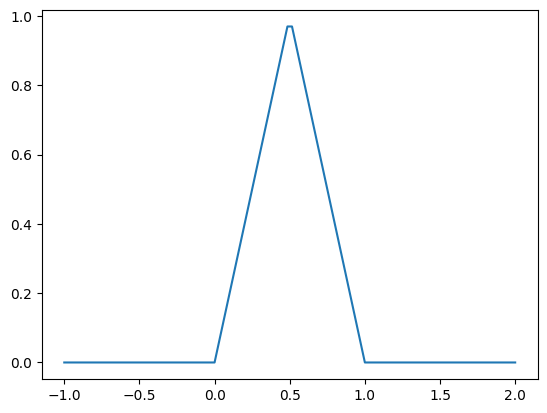

In [12]:
y =tri(X)

plt.plot(X,y)

As a matter of fact, there is a theorem that says: a NN with one hidden layer with n-nodes and ReLU activations can generate all piecewise linear continuous functions with at most n+1 breakpoints.  

BIG QUESTION: If we do not know the correct values of $W$ and $b$, how do we determine the parameters W's and b' that would give us the triangular function?

We would be happy if the output $y$ were close in value to the value of the function at that $x$, $f(x)$. Let's measure $y$ "$\textbf{closeness}$" to the function $f(x)$ by a **Cost** function

COST FUNCTION

![Cost function](https://github.com/gg5d/Math_Intro_NN/blob/master/screenshots_NN/small_NN_cost_function.png?raw=true)

IMPORTANT FACT:  The output $y$ of the NN is a function of x, but also of  four W's and three b's.

GOAL:  find values of all W's and b's that would *minimize* the Cost function

First STEP: since we have no clue, we start with random or otherwise chosen values for W's and b's

ALGORITHM: After the first step, the cost function is most likely not zero [if it is zero you are done! Congratulations!], and we need to tweak/change the parameters $W$'s and $b$'s.

We use an idea by **Newton** to modify the parameters W's and b's. And we will keep repeating it until we are happy with the result.

I am going to show you on the board how the algorithm works in one dimension, for higher dimensions it is called **Gradient Descent**
https://en.wikipedia.org/wiki/Gradient_descent

For the gradient/partial derivatives we need a lot of derivatives [CHAIN RULE], here they are:

![partial derivatives](https://github.com/gg5d/Math_Intro_NN/blob/master/screenshots_NN/small_NN_gradients.png?raw=true)

In one iteration of the algorithm, each parameter will be modified as follows:

![Gradient Descent](https://github.com/gg5d/Math_Intro_NN/blob/master/screenshots_NN/small_NN_gradient_descent.png?raw=true)

$h$ is called *learning rate*.

This algorithm is called **backpropagation**. Here is an implementation in python:

In [13]:
# Define the cost function
def cost_function(y, y_hat):
    return 0.5 * np.sum((y - y_hat)**2)

# Define the gradient function
def gradient(x, y, a1, a2):
    delta2 = (a2 - y) * sigma_derivative(a2)
    dW2 = np.dot(delta2, a1.T)
    db2 = delta2
    delta1 = np.dot(W2.T, delta2) * sigma_derivative(a1)
    dW1 = np.dot(delta1, x.T)
    db1 = delta1
    return dW1, db1, dW2, db2

Let's run the backpropagation

- Initialize weights and biases close to the actual values

In [14]:

W1 = np.array([[1.8],[1.8]]) # np.random.randn(hidden_nodes, input_nodes)
b1 = np.array([[0.8],[-.5]]) # np.zeros((hidden_nodes, 1))
W2 = np.array([[1.0,-2.4]]) #np.random.randn(output_nodes, hidden_nodes)
b2 = np.array([[1.0]]) #np.zeros((output_nodes, 1))


- This is where the parameters are modified, and the new Cost function is evaluated.

[You can rerun the following cell as many times as you need: that is until your function is close enough to the triangular function].


In [30]:
# Define the learning rate and number of iterations (the number of times we will repeat backpropagation)
learning_rate = 0.1
num_iterations = 1000

# Perform gradient descent
for i in range(num_iterations):
    # Initialize the gradients
    dW1 = np.zeros_like(W1)
    db1 = np.zeros_like(b1)
    dW2 = np.zeros_like(W2)
    db2 = np.zeros_like(b2)

    # Compute the gradients for each sample
    for j in range(X.shape[0]):
        x = X[j].reshape(input_nodes, 1)
        y_true = y[j].reshape(output_nodes, 1)

        # Forward propagation
        a1, a2 = forward_propagation(x)

        # Compute the cost
        cost = cost_function(y_true, a2)

        # Gradient
        dW1_j, db1_j, dW2_j, db2_j = gradient(x, y_true, a1, a2)

        # Accumulate the gradients
        dW1 += dW1_j
        db1 += db1_j
        dW2 += dW2_j
        db2 += db2_j

    # Average the gradients over all samples
    dW1 /= X.shape[0]
    db1 /= X.shape[0]
    dW2 /= X.shape[0]
    db2 /= X.shape[0]

    # Update the weights and biases: backpropagation
    W1 -= learning_rate*dW1
    b1 -= learning_rate*db1
    W2 -= learning_rate*dW2
    b2 -= learning_rate*db2



Let's see what we got:

In [31]:
print(W1,b1,W2,b2)

[[1.9579573 ]
 [1.64618872]] [[ 0.18139054]
 [-0.82598162]] [[ 0.99202284 -2.37794493]] [[-0.16531364]]


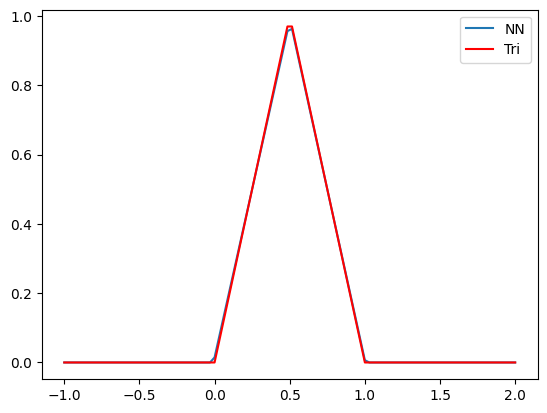

In [32]:
Y = output(X)
plt.plot(X,Y, label="NN")
plt.plot(X,y, color='r', label="Tri")
plt.legend()